# Base de données accidents corporels de la circulation
https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/

Ce jeu de données provient d'un service public certifié
 NEC MERGITUR
Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. Ces saisies sont rassemblées dans une fiche intitulée bulletin d’analyse des accidents corporels. L’ensemble de ces fiches constitue le fichier national des accidents corporels de la circulation dit " Fichier BAAC " administré par l’Observatoire national interministériel de la sécurité routière "ONISR".

Les bases de données, extraites du fichier BAAC, répertorient l'intégralité des accidents corporels de la circulation intervenus durant une année précise en France métropolitaine ainsi que les départements d’Outre-mer (Guadeloupe, Guyane, Martinique, La Réunion et Mayotte depuis 2012) avec une description simplifiée. Cela comprend des informations de localisation de l’accident, telles que renseignées ainsi que des informations concernant les caractéristiques de l’accident et son lieu, les véhicules impliqués et leurs victimes.

Par rapport aux bases de données agrégées 2005-2010 et 2006-2011 actuellement disponibles sur le site www.data.gouv.fr, les bases de données de 2005 à 2016 sont désormais annuelles et composées de 4 fichiers (Caractéristiques – Lieux – Véhicules – Usagers ) au format csv.

Ces bases occultent néanmoins certaines données spécifiques relatives aux usagers et aux véhicules et à leur comportement dans la mesure où la divulgation de ces données porterait atteinte à la protection de la vie privée des personnes physiques aisément identifiables ou ferait apparaître le comportement de telles personnes alors que la divulgation de ce comportement pourrait leur porter préjudice (avis de la CADA – 2 janvier 2012).

# Téléchargement de la documentation
https://www.data.gouv.fr/fr/datasets/r/36496bab-a042-47bf-b08b-3c7467f2bddf

# données
https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e

https://www.data.gouv.fr/fr/datasets/r/e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526

https://www.data.gouv.fr/fr/datasets/r/08b77510-39c4-4761-bf02-19457264790f

https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7


In [95]:
!git add ib02_accidents_corporels_de_la_circulation.ipynb
!git commit -m "ibo2_next"
!git push origin

[master eb6cc35] ibo2_next
 1 file changed, 128 insertions(+), 15 deletions(-)
Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 6.85 KiB | 6.85 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romainjouin/formation_python/
   e90b6a6..eb6cc35  master -> master


# -1) imports

In [9]:
%matplotlib inline
import seaborn as sns

In [10]:
import pandas as pd

In [11]:
import pandas as pd

# 0) Téléchargement des données : base des lieux

In [54]:
base_des_lieux = "https://www.data.gouv.fr/fr/datasets/r/08b77510-39c4-4761-bf02-19457264790f" 
path = base_des_lieux
lieux = pd.read_csv(path, encoding="latin1")

/Users/romain/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
lieux.head().T

,0,1,2,3,4
Num_Acc,201600000001,201600000002,201600000003,201600000004,201600000005
catr,3,3,3,4,4
voie,39,39,1,0,0
v1,NaN,NaN,NaN,NaN,NaN
v2,NaN,NaN,NaN,NaN,NaN
circ,2,1,2,2,0
nbv,0,0,2,0,0
pr,NaN,NaN,NaN,NaN,NaN
pr1,NaN,NaN,NaN,NaN,NaN
vosp,0,0,0,0,0


# Renommage des colonnes

In [56]:
lieux.columns

Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')

In [76]:
nouvelles_columns = ["Num_Acc", 
                     "categorie_route", 
                     "numero_de_route", 
                     "indice_du_numero_de_route", 
                     "indice_alpha", 
                     "regime_de_circulation", 
                     "nb_de_voies", 
                     "numero_de_la_borne_de_rattachemen",
                     "distance_a_la_borne",
                     "existence_voie_reservee", 
                     "declivite",
                     "trace_du_plan",
                     "largeur_terre_plein",
                     "largeur_chaussee", 
                     "etat_surface", 
                     "infrastructure",
                     "endroit", "a_une_ecole"]

In [77]:
list(zip(nouvelles_columns, lieux.columns))

[('Num_Acc', 'Num_Acc'),
 ('categorie_route', 'catr'),
 ('numero_de_route', 'voie'),
 ('indice_du_numero_de_route', 'v1'),
 ('indice_alpha', 'v2'),
 ('regime_de_circulation', 'circ'),
 ('nb_de_voies', 'nbv'),
 ('numero_de_la_borne_de_rattachemen', 'pr'),
 ('distance_a_la_borne', 'pr1'),
 ('existence_voie_reservee', 'vosp'),
 ('declivite', 'prof'),
 ('trace_du_plan', 'plan'),
 ('largeur_terre_plein', 'lartpc'),
 ('largeur_chaussee', 'larrout'),
 ('etat_surface', 'surf'),
 ('infrastructure', 'infra'),
 ('endroit', 'situ'),
 ('a_une_ecole', 'env1')]

In [78]:
df.columns = nouvelles_columns

In [79]:
df.head().T

,0,1,2,3,4
Num_Acc,201600000001,201600000002,201600000003,201600000004,201600000005
categorie_route,3,3,3,4,4
numero_de_route,39,39,1,0,0
indice_du_numero_de_route,NaN,NaN,NaN,NaN,NaN
indice_alpha,NaN,NaN,NaN,NaN,NaN
regime_de_circulation,2,1,2,2,0
nb_de_voies,0,0,2,0,0
numero_de_la_borne_de_rattachemen,NaN,NaN,NaN,NaN,NaN
distance_a_la_borne,NaN,NaN,NaN,NaN,NaN
existence_voie_reservee,0,0,0,0,0


# Etudions le nb_de_voie

In [39]:
df.nb_de_voies.unique()

array([ 0.,  2.,  1.,  4.,  3., nan,  5.,  6., 10.,  8., 12.,  7., 13.,
       11.,  9.])

In [41]:
df.nb_de_voies.value_counts(dropna=False)

 2.0     31250
 0.0      7886
 1.0      7452
 4.0      5656
 3.0      4689
 6.0      1383
 5.0       575
 8.0       259
NaN        164
 7.0        78
 10.0       21
 9.0         8
 11.0        6
 12.0        3
 13.0        2
Name: nb_de_voies, dtype: int64

In [42]:
len(df.nb_de_voies.unique())

15

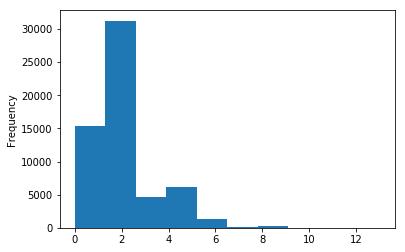

In [47]:

df.nb_de_voies.plot.hist()

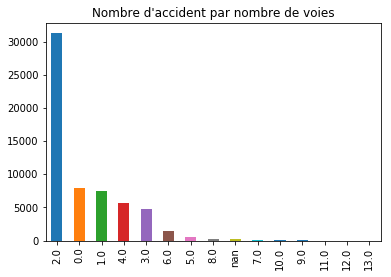

In [82]:
title = "Nombre d'accident par nombre de voies"
to_plot = df.nb_de_voies.value_counts(dropna=False)
to_plot.plot.bar(title=title)

# analysons la declivite

## Multi cursor :

1) créer le multi cursor = ALT + clic souris

2) se déplacer à droite de toutes les lignes : 
CMD + flèche droite (sur mac)

3) se déplacer à gauche de toutes les lignes : 
CMD + flèche gauche (sur mac)

4) se déplacer d'un mot en le sélectionnant : MAJ + flèche

5) rajouter des guillements autour de la sélection : guillemets

## Appliquer un dictionnaire pour changer des codes en noms descriptives (par exemple)

In [87]:
dico = {
0 : "inconnue",
1 : "Partie rectiligne",
2 : "En courbe à gauche ",
3 : "En courbe à droite",
4 : "En « S »",
}

In [91]:
df["declivite_enc"] = df.declivite.map(dico)

In [92]:
df.declivite_enc.value_counts()

Partie rectiligne       43956
En courbe à gauche      8226
inconnue                 5431
En courbe à droite      1015
En « S »                  648
Name: declivite_enc, dtype: int64

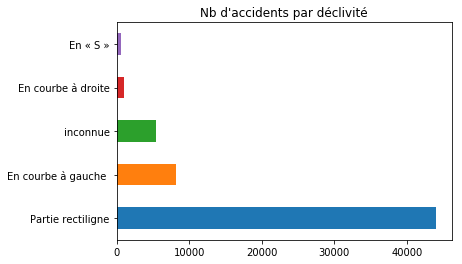

In [96]:
title = "Nb d'accidents par déclivité"
df.declivite_enc.value_counts().plot.barh(title=title)

In [84]:
df.declivite.value_counts(dropna=False)

 1.0    43956
 2.0     8226
 0.0     5431
 3.0     1015
 4.0      648
NaN       156
Name: declivite, dtype: int64

# Situation de l'accident

In [108]:
dico = {
None : "inconnue",
0 : "inconnue",
1 : "Sur chaussée",
2 : "Sur bande d’arrêt d’urgence ",
3 : "Sur accotement",
4 : "Sur trottoir",
5 : "Sur piste cyclable",
}

In [109]:
df.endroit.value_counts(dropna=False)

 1.0    49199
 0.0     4618
 3.0     3479
 4.0     1008
 5.0      427
 2.0      408
NaN       293
Name: endroit, dtype: int64

In [110]:
df["endroit_enc"] = df.endroit.map(dico)

In [111]:
df.endroit_enc.value_counts(dropna=False)

Sur chaussée                    49199
inconnue                          4911
Sur accotement                    3479
Sur trottoir                      1008
Sur piste cyclable                 427
Sur bande d’arrêt d’urgence       408
Name: endroit_enc, dtype: int64

In [117]:
dico = {
1 : "normale ",
2 : "mouillée",
3 : "flaques",
4 : "inondée",
5 : "enneigée",
6 : "boue",
7 : "verglacée",
8 : "corps gras - huile ",
9 : "autre",
}

In [118]:
df["etat_surface_enc"]= df.etat_surface.map(dico)

# Influence de l'état de la surface sur le lieu de l'accident

In [112]:
df.columns

Index(['Num_Acc', 'categorie_route', 'numero_de_route',
       'indice_du_numero_de_route', 'indice_alpha', 'regime_de_circulation',
       'nb_de_voies', 'numero_de_la_borne_de_rattachemen',
       'distance_a_la_borne', 'existence_voie_reservee', 'declivite',
       'trace_du_plan', 'largeur_terre_plein', 'largeur_chaussee',
       'etat_surface', 'infrastructure', 'endroit', 'a_une_ecole',
       'declivite_enc', 'endroit_enc'],
      dtype='object')

In [120]:
gp_count = df.groupby(["etat_surface_enc", "endroit_enc"])["Num_Acc"].count()

In [124]:
import numpy as np

In [131]:
somme = gp_count.values.sum()
somme

56073

In [144]:
taille_des_cercles = [500*(x / max_) for x in gp_count.values]

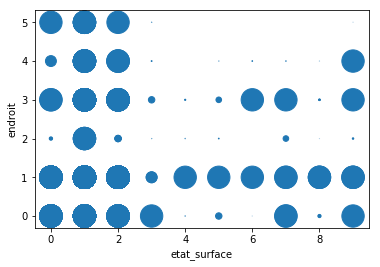

In [145]:
df.plot.scatter("etat_surface", "endroit",s=taille_des_cercles)

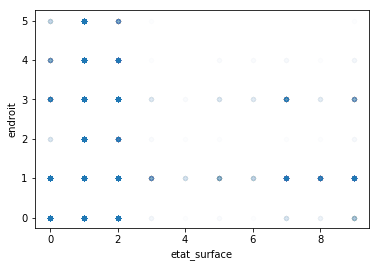

In [147]:
df.plot.scatter("etat_surface", "endroit",alpha=0.01)

# Seaborn

In [148]:
import seaborn as sns

In [150]:
tab = df.pivot_table(                      columns="etat_surface_enc", 
               index="endroit_enc",   values="Num_Acc",
                                      aggfunc="count")
tab

etat_surface_enc,autre,boue,corps gras - huile,enneigée,flaques,inondée,mouillée,normale,verglacée
endroit_enc,,,,,,,,,
Sur accotement,52.0,10.0,9.0,12.0,11.0,2.0,844.0,2364.0,82.0
Sur bande d’arrêt d’urgence,3.0,NaN,1.0,1.0,2.0,1.0,107.0,280.0,1.0
Sur chaussée,176.0,22.0,106.0,43.0,55.0,14.0,8980.0,37566.0,156.0
Sur piste cyclable,1.0,NaN,NaN,NaN,1.0,NaN,58.0,346.0,NaN
Sur trottoir,4.0,2.0,1.0,2.0,1.0,NaN,163.0,779.0,3.0
inconnue,32.0,1.0,6.0,2.0,9.0,4.0,629.0,3116.0,13.0


In [170]:
gp_count = df.groupby(["etat_surface_enc", "endroit_enc"])["Num_Acc"].count()

In [171]:
gp_count.values

array([   52,     3,   176,     1,     4,    32,    10,    22,     2,
           1,     9,     1,   106,     1,     6,    12,     1,    43,
           2,     2,    11,     2,    55,     1,     1,     9,     2,
           1,    14,     4,   844,   107,  8980,    58,   163,   629,
        2364,   280, 37566,   346,   779,  3116,    82,     1,   156,
           3,    13])

In [167]:
s = pd.Series(gp_count.values)

In [176]:
_n_eme_centile = s.quantile(0.93)

# Changer la taille d'une figure

In [188]:
from matplotlib import pyplot as plt

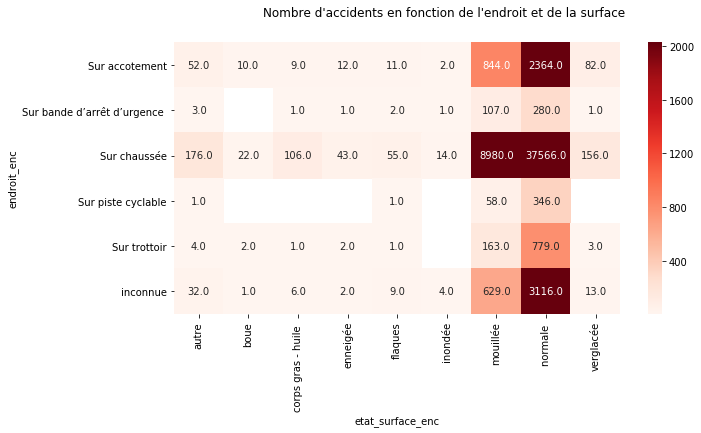

In [196]:
title = "Nombre d'accidents en fonction de l'endroit et de la surface"
sns.heatmap(tab, vmax=_n_eme_centile, annot=True, fmt="", cmap="Reds")
fig = plt.gcf()
fig.set_size_inches(10,5)
fig.suptitle(title);

# Taille du dataset

In [27]:
lieux.shape

(59432, 18)

In [24]:
url_usagers = "https://www.data.gouv.fr/fr/datasets/r/e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526"
usagers =pd.read_csv(url_usagers, encoding="latin1")
usagers.shape

(133422, 12)